In [4]:
import pandas as pd
news_crawling1 = pd.read_csv('data/news_crawling.txt', encoding='CP949')
news_crawling2 = pd.read_csv('data/news_crawling2.txt', encoding='CP949')
news_crawling3 = pd.read_csv('data/news_crawling3.txt', encoding='CP949')
news_crawling4 = pd.read_csv('data/news_crawling4.txt', encoding='CP949')
news_crawling5 = pd.read_csv('data/news_crawling5.txt', encoding='CP949')
news_crawling1

,x
0,전남 광양시 진상면은 지난 11~13일 3일간 독거노인 32개 가정에 화장실 안전바...
1,모든 것이 하나로 연결되는 건축 컨셉을 바탕으로 르웨스트에 조성되는 컨벤션센터와 호...
2,"'우정지구에 노인복지관 2025년까지 건립' '시설관리공단, 제63회 전국남녀 피겨..."
3,같은 날 충북 청주시 상당구 청주중앙공원에 한 노인은 부채를 챙겨 마실을 나왔다 피...
4,이는 하루 전인 13일 김천시 관내 노인주간보호시설 등에서 27명의 신규 확진자가 ...
...,...
95,"과장은 지난 12일 취약계층을 위해 서리태 블랙두유 1,000박스를 (사)연제이웃사..."
96,한국능률교육평가원에서는 청소년 대인기피증·사회불안장애증상 개선 상담을 돕는 청소년심...
97,"민간자격증 과정은 △심리상담<U+2013>심리상담사, 미술심리상담사, 아동심리상담사..."
98,삼양동새마을부녀회(회장 양혜숙)에서는 지난 11일 지역내에서 회원 10여명이 참여한...


In [6]:
news_crawling = pd.concat([news_crawling1, news_crawling2, news_crawling3, news_crawling4, news_crawling5])

In [7]:
news_crawling

,x
0,전남 광양시 진상면은 지난 11~13일 3일간 독거노인 32개 가정에 화장실 안전바...
1,모든 것이 하나로 연결되는 건축 컨셉을 바탕으로 르웨스트에 조성되는 컨벤션센터와 호...
2,"'우정지구에 노인복지관 2025년까지 건립' '시설관리공단, 제63회 전국남녀 피겨..."
3,같은 날 충북 청주시 상당구 청주중앙공원에 한 노인은 부채를 챙겨 마실을 나왔다 피...
4,이는 하루 전인 13일 김천시 관내 노인주간보호시설 등에서 27명의 신규 확진자가 ...
...,...
95,이는 코로나 감염우려가 높아 장년층과 노년층의 자동차 운행을 자제했기 때문이다 환급...
96,백내장은 노년층의 70% 이상이 겪을 만큼 흔한 노인성 안질환이다 책이나 스마트폰을...
97,임플란트는 전반적으로 초창기보다 비용 면에서 낮아진 상태이고 노년층의 경우 건강보험...
98,"어지럼증은 연령대를 가리지 않고 발병하는 질병이지만, 노년층에게 많이 생긴다 65세..."


In [9]:
import re
import nltk
from konlpy.tag import Okt; t= Okt()

In [11]:
stopwords = pd.read_csv('data/stopwords_ko.txt', sep='|')
stopwords

,가
0,가까스로
1,가령
2,각
3,각각
4,각자
...,...
589,휘익
590,휴
591,흐흐
592,흥


In [12]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f: #데이터 f 함수를 이용하여 불러오기
        data = [line.split('\t') for line in f.read().splitlines()] 
        #f 함수를 이용하여 먼저 줄별로 split한 데이터를 반복문을 통해서 띄어쓰기를 구분자로 split한 것을 리스트로 반환
    
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data
    
L = read_data('data/stopwords_ko.txt')
stopwords = [item for sublist in L for item in sublist]
print (stopwords)

['가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어', '든간

In [13]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f: #데이터 f 함수를 이용하여 불러오기
        data = [line.split('\t') for line in f.read().splitlines()] 
        #f 함수를 이용하여 먼저 줄별로 split한 데이터를 반복문을 통해서 띄어쓰기를 구분자로 split한 것을 리스트로 반환
    
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data
    
L = read_data('data/stopwords.txt')
stopwords2 = [item for sublist in L for item in sublist]
print (stopwords2)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

In [14]:
X_train = []
for sentence in news_crawling['x']:
    sentence = re.sub('([a-zA-Z])','',sentence)
    sentence = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',sentence)
    sentence = re.sub(r'[0-9]+', '', sentence)
    sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    sentence = hangul.sub('', sentence)
    temp_X = t.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords2]
    X_train.append(temp_X)

In [15]:
X_train = [item for sublist in X_train for item in sublist]
print (X_train)

['전남', '광양시', '진상면', '은', '지난', '일간', '독거', '노인', '개', '가정', '화장실', '안전', '바', '미끄럼', '방지', '매트', '광양시', '진상면', '독거', '노인', '가정', '편의', '시설', '성', '인용', '보행기', '지원', '한국', '수자원공사', '여수', '권', '지사', '는', '매년', '어버이날', '모든', '하나로', '연결', '되다', '건축', '컨셉', '바탕', '르', '웨스트', '조성', '되다', '컨벤션', '센터', '호텔', '노인', '복지', '주', '블록', '블록', '에는', '판매', '시설', '업무', '시설', '블록', '에는', '노인', '복지', '주택', '들어서다', '예정', '이다', '우정', '지구', '노인', '복지관', '건립', '시설', '관리', '공단', '회', '전국', '남녀', '피겨스케이팅', '종별', '선수권대회', '의정부시', '는', '오다', '녹양동', '우정', '지구', '노인', '복지관', '건립', '하다', '계획', '이라고', '밝히다', '날', '충북', '청주시', '상당구', '청주', '중앙', '공원', '하다', '노인', '은', '부채', '챙기다', '말다', '나오다', '피부', '보호', '위해', '외투', '걸치다', '하다', '는', '덥다', '날씨', '연신', '부채질', '하다', '공원', '윷놀이', '하다', '노인', '은', '약속', '이라도', '이다', '하루', '전인', '김천시', '관내', '노인', '주간', '보호', '시설', '명의', '신규', '확', '진자', '발생', '하고', '최근', '주', '간', '는', '괜찮다', '라는', '안일하다', '사고', '방심', '사태', '키우다', '방역', '수', '칙', '위반', '한', '노인', '주간', '보', '호텔', '노인',

In [16]:
ko = nltk.Text(X_train)
ko.vocab().most_common(100)

[('하다', 584),
 ('은', 327),
 ('는', 225),
 ('노인', 176),
 ('한', 167),
 ('어르신', 160),
 ('층', 159),
 ('세', 152),
 ('되다', 149),
 ('고령자', 140),
 ('시니어', 139),
 ('노년', 124),
 ('복지', 113),
 ('접종', 111),
 ('적', 108),
 ('시설', 101),
 ('건강', 99),
 ('인', 89),
 ('주택', 87),
 ('에는', 78),
 ('이다', 78),
 ('수', 76),
 ('위해', 74),
 ('대상', 73),
 ('하고', 72),
 ('코로나', 66),
 ('명', 65),
 ('사업', 58),
 ('다양하다', 57),
 ('통해', 56),
 ('지난', 54),
 ('센터', 53),
 ('돼다', 53),
 ('만', 52),
 ('다', 52),
 ('백신', 50),
 ('서비스', 49),
 ('위', 49),
 ('도', 47),
 ('지역', 45),
 ('사회', 45),
 ('뉴', 44),
 ('트리', 44),
 ('플랜', 44),
 ('중', 41),
 ('시', 41),
 ('분야', 40),
 ('지원', 38),
 ('방문', 38),
 ('받다', 38),
 ('속', 37),
 ('위치', 36),
 ('집중', 36),
 ('따르다', 35),
 ('지', 35),
 ('돌보다', 35),
 ('모습', 33),
 ('광고', 33),
 ('발레리나', 33),
 ('서퍼', 33),
 ('바이크', 33),
 ('정비사', 33),
 ('타투', 33),
 ('이스트', 33),
 ('이발사', 33),
 ('묵묵하다', 33),
 ('예방접종', 32),
 ('신발', 32),
 ('아티스트', 32),
 ('차례', 32),
 ('등장', 32),
 ('가정', 31),
 ('기관', 31),
 ('특히', 31),
 ('약', 31),
 ('섭취',

In [66]:
stop_words1 = ['이','난','서','이랑','통해', '이스', '에는', '너무', '이렇다', '어떻다','진짜', '되어다', '분들','안되다', '인', '가장','없이', '많이', '니', '이라도', '임', '세','이나','저렇게', '그냥', '위해','때문', '대','거','뭐', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하','니', '못', '요', '지','하고', '싶다', '더', '그렇다', '한테', '없다', '내', '잘', '거', '처럼','분','게','고','음','며','데','만','도','면', '않다', '이고','라','안', '인데', '다','보다', '아니다', '한','이다','하다', '은', '가',  '도','고','만','게', '되다', '를', '수',  '면', '는', '이','도' ]
stop_words2 = ["노인", "어르신", "시니어", "고령자", "노년층"]
stop_words3 =["대표", "은행", "돼다","특히","묘", "종", "위" ,"장", "달","경", "속", "층", "노년","최근","명", "회","적",  "원", "곳", "이스트", "공", "뉴", "률", "중", "전", "지난", "광주은행","납세자", "회장","전문가", "관련", "클럽", "오전", "남구", "오후", "로운","올해", "대한", "대부분", "불타", "동구","지난해", "이하", "주요", "인천", "때문", "시흥", "하면", "경우", "오늘", "니어", "해","들이", "시흥시", "번째", "하지", "비롯"]
token_ko = [each_word for each_word in X_train if each_word not in stop_words1]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words2]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words3]
ko = nltk.Text(token_ko)
ko.vocab().most_common(100)

[('복지', 113),
 ('접종', 111),
 ('시설', 101),
 ('건강', 99),
 ('주택', 87),
 ('대상', 73),
 ('코로나', 66),
 ('사업', 58),
 ('다양하다', 57),
 ('센터', 53),
 ('백신', 50),
 ('서비스', 49),
 ('지역', 45),
 ('사회', 45),
 ('트리', 44),
 ('플랜', 44),
 ('시', 41),
 ('분야', 40),
 ('지원', 38),
 ('방문', 38),
 ('받다', 38),
 ('위치', 36),
 ('집중', 36),
 ('따르다', 35),
 ('돌보다', 35),
 ('모습', 33),
 ('광고', 33),
 ('발레리나', 33),
 ('서퍼', 33),
 ('바이크', 33),
 ('정비사', 33),
 ('타투', 33),
 ('이발사', 33),
 ('묵묵하다', 33),
 ('예방접종', 32),
 ('신발', 32),
 ('아티스트', 32),
 ('차례', 32),
 ('등장', 32),
 ('가정', 31),
 ('기관', 31),
 ('약', 31),
 ('섭취', 31),
 ('오다', 30),
 ('만들다', 30),
 ('제공', 30),
 ('특별하다', 30),
 ('성', 29),
 ('어렵다', 29),
 ('내레이션', 29),
 ('청년', 28),
 ('시작', 28),
 ('평범하다', 27),
 ('블록', 26),
 ('피부', 26),
 ('프로젝트', 26),
 ('인구', 26),
 ('연령', 26),
 ('조절', 26),
 ('관리', 25),
 ('치매', 25),
 ('시장', 25),
 ('많다', 25),
 ('기준', 25),
 ('차', 24),
 ('틀다', 24),
 ('체중', 24),
 ('복지관', 23),
 ('케어', 23),
 ('이용', 23),
 ('진행', 23),
 ('반려', 23),
 ('어덜트', 23),
 ('예약', 22),
 ('트루', 22

In [67]:
data = ko.vocab().most_common(100)

In [68]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

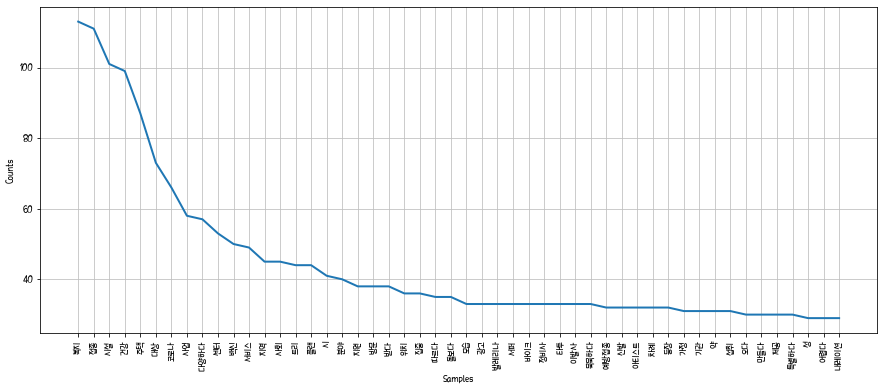

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize = (15, 6))
ko.plot(50)
plt.show()

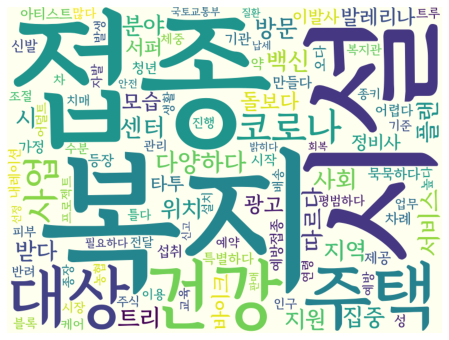

In [70]:
from wordcloud import WordCloud            ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt
myfontpath = "data/경기천년바탕_Bold.ttf" 
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='ivory', width=800, height=600
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()